In [216]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import warnings
import re
warnings.filterwarnings("ignore")



def ConvertAgeAsMonths(AgeString):
    if not pd.isnull(AgeString): 
        AgeSignatureDictionary = {"YEAR":12, "MONTH":1,"DAY":1/30,"WEEK":1/4.15}
        AgePattern = "|".join([i for i in AgeSignatureDictionary.keys()])
        for pattern in AgeSignatureDictionary.keys():
            AgeValue = None        
            if len(re.findall(pattern,AgeString.upper()))>0:
                AgeValue = (re.split(pattern,AgeString.upper())[0].strip())
                AgeValue = np.float16(AgeValue)
                AgeValue = AgeValue*AgeSignatureDictionary.get(pattern)
                AgeValue = None if AgeValue<0 else np.round(AgeValue,3)
                return AgeValue
    return None

# <font color='blue'>IMPORTING DATA</font>

In [217]:
intakes = pd.read_csv('Data\Austin_Animal_Center_Intakes.csv')
outcomes = pd.read_csv('Data\Austin_Animal_Center_Outcomes.csv')

In [218]:
intakes.info()
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124120 entries, 0 to 124119
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124120 non-null  object
 1   Name              85069 non-null   object
 2   DateTime          124120 non-null  object
 3   MonthYear         124120 non-null  object
 4   Found Location    124120 non-null  object
 5   Intake Type       124120 non-null  object
 6   Intake Condition  124120 non-null  object
 7   Animal Type       124120 non-null  object
 8   Sex upon Intake   124119 non-null  object
 9   Age upon Intake   124120 non-null  object
 10  Breed             124120 non-null  object
 11  Color             124120 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124491 entries, 0 to 124490
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------

#  <font color='blue'>CLEANING DATA</font>

### Filtering relevant Data

In [219]:
dfIntake = intakes[['Animal ID', 'DateTime', 'Found Location', 'Intake Type', 'Intake Condition', 'Animal Type','Sex upon Intake','Age upon Intake', 'Breed', 'Color']]
dfIntake.columns = ['ANIMALID', 'DATETIME_INTAKE', 'LOCATION', 'INTAKETYPE', 'INTAKECONDITION', 'ANIMALTYPE','SEXINTAKE','AGEINTAKE', 'BREED', 'COLOR']

dfOutcomes=outcomes[['Animal ID', 'DateTime', 'Date of Birth', 'Outcome Type', 'Outcome Subtype', 'Sex upon Outcome', 'Age upon Outcome']]
dfOutcomes.columns = ['ANIMALID', 'DATETIME_OUTCOME', 'DOB', 'OUTCOMETYPE', 'OUTCOMESUBTYPE', 'SEXOUTCOME', 'AGEOUTCOME']

#### Converting Datetime columns (as string) into DataTime objects
#### Converting Age_intake and Age_Outcome from strings to numeric number of months

In [220]:
dfIntake['DATETIME_INTAKE'] = dfIntake['DATETIME_INTAKE'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %H:%M:%S %p')).values
dfOutcomes['DATETIME_OUTCOME'] = dfOutcomes['DATETIME_OUTCOME'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %H:%M:%S %p'))
dfIntake.AGEINTAKE = dfIntake.AGEINTAKE.apply(lambda x: ConvertAgeAsMonths(x))
dfOutcomes.AGEOUTCOME = dfOutcomes.AGEOUTCOME.apply(lambda x: ConvertAgeAsMonths(x))
dfIntake.info()
dfOutcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124120 entries, 0 to 124119
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ANIMALID         124120 non-null  object        
 1   DATETIME_INTAKE  124120 non-null  datetime64[ns]
 2   LOCATION         124120 non-null  object        
 3   INTAKETYPE       124120 non-null  object        
 4   INTAKECONDITION  124120 non-null  object        
 5   ANIMALTYPE       124120 non-null  object        
 6   SEXINTAKE        124119 non-null  object        
 7   AGEINTAKE        124113 non-null  float64       
 8   BREED            124120 non-null  object        
 9   COLOR            124120 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 9.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124491 entries, 0 to 124490
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  

### On Closer Evaluation of DataSets
Its noted that each animal might have N entries as intakes and N entries as outcomes...hence inorder to merge the correct intake with the outcome chronologically. see Below - the dog A717053 has been a serial stray almost 9 times and each time the outcome was he was returned to the owner.

In [221]:
print("Entry records of A717053",dfIntake[dfIntake.ANIMALID == 'A717053'].sort_values('DATETIME_INTAKE').shape)
print("Outcome records of A717053",dfOutcomes[dfOutcomes.ANIMALID == 'A717053'].sort_values('DATETIME_OUTCOME').shape)
print(80*"#")
print(dfIntake[dfIntake.ANIMALID == 'A717053'][['ANIMALID','DATETIME_INTAKE','INTAKETYPE']].sort_values('DATETIME_INTAKE'))
print(80*"#")
print(dfOutcomes[dfOutcomes.ANIMALID == 'A717053'][['ANIMALID','DATETIME_OUTCOME','OUTCOMETYPE']].sort_values('DATETIME_OUTCOME'))

Entry records of A717053 (9, 10)
Outcome records of A717053 (9, 7)
################################################################################
       ANIMALID     DATETIME_INTAKE INTAKETYPE
62998   A717053 2015-12-01 12:26:00      Stray
80114   A717053 2016-04-21 11:55:00      Stray
6574    A717053 2017-11-04 03:30:00      Stray
112269  A717053 2018-03-24 02:44:00      Stray
19567   A717053 2018-04-23 10:35:00      Stray
105881  A717053 2018-08-26 03:16:00      Stray
29231   A717053 2018-09-16 09:51:00      Stray
3021    A717053 2019-08-04 03:14:00      Stray
109005  A717053 2019-11-12 04:17:00      Stray
################################################################################
       ANIMALID    DATETIME_OUTCOME      OUTCOMETYPE
5152    A717053 2015-12-02 04:22:00  Return to Owner
72592   A717053 2016-04-21 06:58:00  Return to Owner
93265   A717053 2017-11-06 05:14:00  Return to Owner
43352   A717053 2018-03-26 05:10:00  Return to Owner
105976  A717053 2018-04-25 04:30:00 

## Merging intakes and outcomes
Inorder to merge - intake and outcomes is added with a new column of chronology to match records.

In [222]:
dfIntake['PREVHIST']=dfIntake.groupby('ANIMALID')['DATETIME_INTAKE'].rank(method="dense", ascending=True)
dfIntake['PREVHIST']=dfIntake['PREVHIST']-1
dfOutcomes['PREVHIST']=dfOutcomes.groupby('ANIMALID')['DATETIME_OUTCOME'].rank(method="dense", ascending=True)
dfOutcomes['PREVHIST']=dfOutcomes['PREVHIST']-1

In [223]:
dfAnimals = pd.merge(left=dfIntake, right=dfOutcomes, on =['ANIMALID','PREVHIST'], how='inner')
dfAnimals.sort_values(['ANIMALID','PREVHIST'],inplace=True)
dfAnimals = dfAnimals.reset_index(drop=True)


In [224]:
dfAnimals['DAYS_STAY']=dfAnimals[['DATETIME_INTAKE','DATETIME_OUTCOME']].apply(lambda row: (row['DATETIME_OUTCOME'] - row['DATETIME_INTAKE']).days,axis=1)
rmanimals = dfAnimals[dfAnimals.DAYS_STAY<0].sort_values('DAYS_STAY').ANIMALID.unique()
dfAnimals = dfAnimals[~dfAnimals.ANIMALID.isin(rmanimals)]

dfAnimals.to_csv('AnimalShelterData.csv',index=False)

# Exploring Animal Type


In [225]:
##############################################################
# Exploring Animal Type in the IntakeData
##############################################################
# Comments 
# --------
# Predominantly the data is skeweed towards dogs with almost 70K records 
# probably analysis could be restricted to dogs only (or even add cats)
##############################################################
animalcounts = dfAnimals.ANIMALTYPE.value_counts()
animalcounts = animalcounts.reset_index()
animalcounts.columns = ["ANIMALTYPE","COUNT"]
animalcounts['PCT'] = np.round(100.0*animalcounts['COUNT']/animalcounts['COUNT'].sum(),2)
fig = px.bar(animalcounts, x='ANIMALTYPE', y='COUNT', text=animalcounts['PCT'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.show()

animalcounts

,ANIMALTYPE,COUNT,PCT
0,Dog,65251,56.37
1,Cat,43754,37.80
2,Other,6171,5.33
3,Bird,553,0.48
4,Livestock,17,0.01


# Restricting Analysis to Dogs


In [226]:
filterlogic = dfAnimals.ANIMALTYPE.isin(['Dog'])
dfAnimals = dfAnimals[filterlogic]

# Exploring Columns of the dataset

In [227]:
dfAnimals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65251 entries, 0 to 123590
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ANIMALID          65251 non-null  object        
 1   DATETIME_INTAKE   65251 non-null  datetime64[ns]
 2   LOCATION          65251 non-null  object        
 3   INTAKETYPE        65251 non-null  object        
 4   INTAKECONDITION   65251 non-null  object        
 5   ANIMALTYPE        65251 non-null  object        
 6   SEXINTAKE         65250 non-null  object        
 7   AGEINTAKE         65248 non-null  float64       
 8   BREED             65251 non-null  object        
 9   COLOR             65251 non-null  object        
 10  PREVHIST          65251 non-null  float64       
 11  DATETIME_OUTCOME  65251 non-null  datetime64[ns]
 12  DOB               65251 non-null  object        
 13  OUTCOMETYPE       65239 non-null  object        
 14  OUTCOMESUBTYPE    212

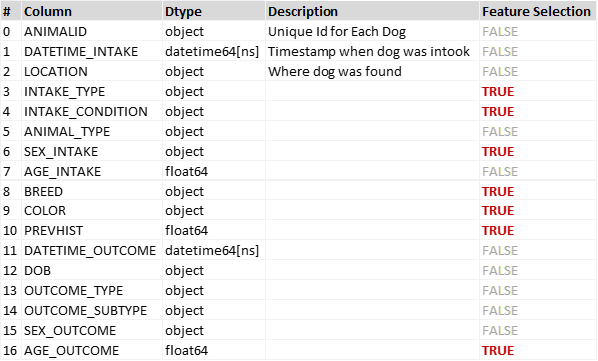

# Exploring "INTAKE_TYPE" of Dogs


In [228]:
animal_intaketype = dfAnimals.INTAKETYPE.value_counts()
animal_intaketype = animal_intaketype.reset_index()
animal_intaketype.columns = ["INTAKETYPE","COUNT"]

animal_intaketype['PCT'] = np.round(100.0*animal_intaketype['COUNT']/animal_intaketype['COUNT'].sum(),2)
fig = px.bar(animal_intaketype, x='INTAKETYPE', y='COUNT', text=animal_intaketype['PCT'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.show()

animal_intaketype

,INTAKETYPE,COUNT,PCT
0,Stray,45286,69.40
1,Owner Surrender,13832,21.20
2,Public Assist,5846,8.96
3,Abandoned,144,0.22
4,Euthanasia Request,143,0.22


# Exploring "OUTCOME TYPE" of Dogs


In [229]:
var = 'OUTCOMETYPE'
dfGrp = dfAnimals.groupby(['ANIMALTYPE',var])['ANIMALID'].count()
dfGrp = dfGrp.reset_index(drop=False)
dfGrp = dfGrp.rename(columns={"ANIMALID": "COUNT"})
dfGrp = dfGrp[dfGrp.ANIMALTYPE.isin(['Bird','Cat','Dog','Livestock'])]
dfGrp
a = list()
for animal in dfGrp.ANIMALTYPE.unique():
    dat = dfGrp[dfGrp.ANIMALTYPE==animal]
    dat['PCT'] = np.round(100.0*dat['COUNT']/dat['COUNT'].sum(),2)
    cnt = dat['COUNT'].sum()
    a.append({"data":dat,"count":cnt})
    fig = px.bar(dat, x=var, y='COUNT', title=var+" Distribution [ Animal Type : "+animal+" (#"+ str(cnt)+")]", text=dat['PCT'].apply(lambda x: '{0:1.1f}%'.format(x)))
    fig.show()    

# Exploring "SEX INTAKE" of Dogs


In [230]:
var = 'SEXINTAKE'
dfGrp = dfAnimals.groupby(['ANIMALTYPE',var])['ANIMALID'].count()
dfGrp = dfGrp.reset_index(drop=False)
dfGrp = dfGrp.rename(columns={"ANIMALID": "COUNT"})
dfGrp = dfGrp[dfGrp.ANIMALTYPE.isin(['Bird','Cat','Dog','Livestock'])]
dfGrp
a = list()
for animal in dfGrp.ANIMALTYPE.unique():
    dat = dfGrp[dfGrp.ANIMALTYPE==animal]
    dat['PCT'] = np.round(100.0*dat['COUNT']/dat['COUNT'].sum(),2)
    cnt = dat['COUNT'].sum()
    a.append({"data":dat,"count":cnt})
    fig = px.bar(dat, x=var, y='COUNT', title=var+" Distribution [ Animal Type : "+animal+" (#"+ str(cnt)+")]", text=dat['PCT'].apply(lambda x: '{0:1.1f}%'.format(x)))
    fig.show()    

# Exploring "INTAKE_CONDITION" of Dogs


In [231]:
var = 'INTAKECONDITION'
dfGrp = dfAnimals.groupby(['ANIMALTYPE',var])['ANIMALID'].count()
dfGrp = dfGrp.reset_index(drop=False)
dfGrp = dfGrp.rename(columns={"ANIMALID": "COUNT"})
dfGrp = dfGrp[dfGrp.ANIMALTYPE.isin(['Bird','Cat','Dog','Livestock'])]
dfGrp
a = list()
for animal in dfGrp.ANIMALTYPE.unique():
    dat = dfGrp[dfGrp.ANIMALTYPE==animal]
    dat['PCT'] = np.round(100.0*dat['COUNT']/dat['COUNT'].sum(),2)
    cnt = dat['COUNT'].sum()
    a.append({"data":dat,"count":cnt})
    fig = px.bar(dat, x=var, y='COUNT', title=var+" Distribution [ Animal Type : "+animal+" (#"+ str(cnt)+")]", text=dat['PCT'].apply(lambda x: '{0:1.1f}%'.format(x)))
    fig.show()    

# Exploring "BREED" of Dogs


In [232]:
var = 'BREED'
dfGrp = dfAnimals.groupby(['ANIMALTYPE',var])['ANIMALID'].count()
dfGrp = dfGrp.reset_index(drop=False)
dfGrp = dfGrp.rename(columns={"ANIMALID": "COUNT"})
dfGrp = dfGrp[dfGrp.ANIMALTYPE.isin(['Bird','Cat','Dog','Livestock'])]
dfGrp
a = list()
for animal in dfGrp.ANIMALTYPE.unique():
    dat = dfGrp[dfGrp.ANIMALTYPE==animal]
    dat['PCT'] = np.round(100.0*dat['COUNT']/dat['COUNT'].sum(),2)
    cnt = dat['COUNT'].sum()
    a.append({"data":dat,"count":cnt})
    fig = px.bar(dat, x=var, y='COUNT', title=var+" Distribution [ Animal Type : "+animal+" (#"+ str(cnt)+")]", text=dat['PCT'].apply(lambda x: '{0:1.1f}%'.format(x)))
    fig.show()      

# Exploring "COLOR" of Dogs


In [233]:
var = 'COLOR'
dfGrp = dfAnimals.groupby(['ANIMALTYPE',var])['ANIMALID'].count()
dfGrp = dfGrp.reset_index(drop=False)
dfGrp = dfGrp.rename(columns={"ANIMALID": "COUNT"})
dfGrp = dfGrp[dfGrp.ANIMALTYPE.isin(['Bird','Cat','Dog','Livestock'])]
dfGrp
a = list()
for animal in dfGrp.ANIMALTYPE.unique():
    dat = dfGrp[dfGrp.ANIMALTYPE==animal]
    dat['PCT'] = np.round(100.0*dat['COUNT']/dat['COUNT'].sum(),2)
    cnt = dat['COUNT'].sum()
    a.append({"data":dat,"count":cnt})
    fig = px.bar(dat, x=var, y='COUNT', title=var+" Distribution [ Animal Type : "+animal+" (#"+ str(cnt)+")]", text=dat['PCT'].apply(lambda x: '{0:1.1f}%'.format(x)))
    fig.show()    

# Feature Engineering

In [234]:
dfFeatures = dfAnimals[['ANIMALID','DATETIME_INTAKE','OUTCOMETYPE','AGEOUTCOME','PREVHIST','DAYS_STAY']]
dfFeatures.columns = ['ANIMALID','DATE','OUTCOMETYPE','AGEOUTCOME','PREVHIST','DAYS_STAY']

In [235]:
####################################################################################################
### Adding Pure Breed Feature
####################################################################################################
featname = 'IS_PUREBREED'
feature = dfAnimals.BREED.apply(lambda x: 0 if len(re.findall('/|MIX',x.upper()))==0 else 1)
if not featname in dfFeatures.columns:
    feature.name = featname
    dfFeatures = pd.concat([dfFeatures,feature],axis=1)

In [236]:
####################################################################################################
### Since most features selected are categorical (not numeric) in nature 
### we need to convert the feature into multiple one-hot vector
### Adding One Hot Features for [INTAKETYPE,INTAKECONDITION, SEXINTAKE]
####################################################################################################
for featname in ['INTAKETYPE','INTAKECONDITION', 'SEXINTAKE']:
#for featname in ['INTAKETYPE']:    
    if not np.any([len(re.findall(featname,i))>0 for i in dfFeatures.columns]):        
        feature = pd.get_dummies(dfAnimals[[featname]], prefix=featname)
        dfFeatures = pd.concat([dfFeatures,feature],axis=1)
        dfFeatures.columns = ["".join(i.upper().split()) for i in dfFeatures.columns]

In [237]:
dfFeatures = dfFeatures[~dfFeatures.OUTCOMETYPE.isnull()]

# Redefining the Outcome variable 
Since the Outcome Type is our prediction variable it is noted that there huge class imbalance where some classes are really huge and some too few. 

In [238]:
def ChangeOutcomeType(x):
    retval = np.NaN
    x = x.upper()
    retval = "ADOPT" if x in ["ADOPTION"] else retval
    retval = "RTO" if x in ['RTO-ADOPT','RETURN TO OWNER'] else retval    
    retval = "DIED" if x in ['EUTHANASIA','DIED'] else retval
    return retval

dfFeatures.OUTCOMETYPE = dfFeatures.OUTCOMETYPE.apply(ChangeOutcomeType)
dfFeatures = dfFeatures[~dfFeatures.OUTCOMETYPE.isnull()]

In [239]:
var = 'OUTCOMETYPE'
dfGrp = dfFeatures.groupby([var])['ANIMALID'].count()
dfGrp = dfGrp.reset_index(drop=False)
dfGrp = dfGrp.rename(columns={"ANIMALID": "COUNT"})
a = list()
dfGrp['PCT'] = np.round(100.0*dfGrp['COUNT']/dfGrp['COUNT'].sum(),2)
cnt = dfGrp['COUNT'].sum()
a.append({"data":dat,"count":cnt})
fig = px.bar(dfGrp, x=var, y='COUNT', title=var+" Distribution [ Animal Type : "+animal+" (#"+ str(cnt)+")]", text=dfGrp['PCT'].apply(lambda x: '{0:1.1f}%'.format(x)))
fig.show()    
dfGrp

,OUTCOMETYPE,COUNT,PCT
0,ADOPT,32138,63.54
1,DIED,1851,3.66
2,RTO,16591,32.80


# Outputing Feature Dataframe to CSV to be used for modelling


In [240]:
dfFeatures.index = dfFeatures[['ANIMALID','DATE']].apply(lambda x: str(x[0])+"_"+str(int(x[1].timestamp())), axis=1)
dfFeatures = dfFeatures.drop(columns=['ANIMALID','DATE'])

In [241]:
#dfFeatures = dfFeatures[dfFeatures.DAYS_STAY>5]
dfFeatures.to_csv('Features.csv',index=True)

In [242]:
dfFeatures

,OUTCOMETYPE,AGEOUTCOME,PREVHIST,DAYS_STAY,IS_PUREBREED,INTAKETYPE_ABANDONED,INTAKETYPE_EUTHANASIAREQUEST,INTAKETYPE_OWNERSURRENDER,INTAKETYPE_PUBLICASSIST,INTAKETYPE_STRAY,...,INTAKECONDITION_NORMAL,INTAKECONDITION_NURSING,INTAKECONDITION_OTHER,INTAKECONDITION_PREGNANT,INTAKECONDITION_SICK,SEXINTAKE_INTACTFEMALE,SEXINTAKE_INTACTMALE,SEXINTAKE_NEUTEREDMALE,SEXINTAKE_SPAYEDFEMALE,SEXINTAKE_UNKNOWN
A006100_1394159160,RTO,72.0,0.0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
A006100_1418984460,RTO,84.0,1.0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
A006100_1512612420,RTO,120.0,2.0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
A134067_1384592520,RTO,192.0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
A141142_1384569960,RTO,180.0,0.0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A829964_1614395820,ADOPT,3.0,0.0,4,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
A829991_1614516960,RTO,24.0,0.0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
A829992_1614474720,RTO,24.0,0.0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
A830080_1614685080,RTO,12.0,0.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
